In [1]:
import json
from functools import reduce
from collections import Counter
from tqdm import tqdm

import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
# %config InlineBackend.figure_format = 'svg'
%config InlineBackend.figure_format = 'retina'
plt.rc('font', family='Times New Roman')
# plt.rcParams['font.serif'] = ['Times New Roman'] 

# import matplotlib.font_manager as fm
# font_family_TNR = fm.FontProperties(fname=r'C:\Windows\Fonts\times.ttf')  # 设置"Times New Roman"字体

In [2]:
def cdee_metric_v1(true_data_all, pred_data_all):
    """
    [
      {
        "core_name": "肺炎",
        "tendency": "",
        "character": ["大叶性"],
        "anatomy_list": ["右肺上叶"]
      },
      {
        "core_name": "结节",
        "tendency": "",
        "character": [],
        "anatomy_list": ["右肺门"]
      }
    ]
    """
    assert len(true_data_all) == len(pred_data_all)

    true_trigs_num, pred_trigs_num, correct_trigs_num = 0, 0, 0
    true_ets_num, pred_ets_num, correct_ets_num = 0, 0, 0
    true_trigs_ets_num, pred_trigs_ets_num, correct_trigs_ets_num = 0, 0, 0
    true_es_num, pred_es_num, correct_es_num = 0, 0, 0
    true_argus_num, pred_argus_num, correct_argus_num = 0, 0, 0

    for i in range(len(true_data_all)):
        true_id = true_data_all[i]['id']
        pred_id = pred_data_all[i]['id']
        assert true_id == pred_id, print(true_id, pred_id)
        true_es = true_data_all[i]['event']
        pred_es = pred_data_all[i]['event']
        true_trigs = set([i['core_name'] for i in true_es])
        pred_trigs = set([i['core_name'] for i in pred_es])
        # true_trigs = [i['core_name'] for i in true_es]
        # pred_trigs = [i['core_name'] for i in pred_es]
        true_trigs_num += len(true_trigs)
        pred_trigs_num += len(pred_trigs)
        # true_trigs = set(true_trigs)
        # pred_trigs = set(pred_trigs)
        correct_trigs_num += len(true_trigs&pred_trigs)

        true_ets = set([i['tendency'] for i in true_es])
        pred_ets = set([i['tendency'] for i in pred_es])
        # true_ets = [i['tendency'] for i in true_es]
        # pred_ets = [i['tendency'] for i in pred_es]
        true_ets_num += len(true_ets)
        pred_ets_num += len(pred_ets)
        # true_ets = set(true_ets)
        # pred_ets = set(pred_ets)
        correct_ets_num += len(true_ets&pred_ets)

        true_trigs_ets = set([f"{i['core_name']}-{i['tendency']}" for i in true_es])
        pred_trigs_ets = set([f"{i['core_name']}-{i['tendency']}" for i in pred_es])
        # true_trigs_ets = [f"{i['core_name']}-{i['tendency']}" for i in true_es]
        # pred_trigs_ets = [f"{i['core_name']}-{i['tendency']}" for i in pred_es]
        # print('true: ' ,true_trigs_ets)
        # print('pred: ', pred_trigs_ets)
        true_trigs_ets_num += len(true_trigs_ets)
        pred_trigs_ets_num += len(pred_trigs_ets)
        # true_trigs_ets = set(true_trigs_ets)
        # pred_trigs_ets = set(pred_trigs_ets)
        correct_trigs_ets_num += len(true_trigs_ets&pred_trigs_ets)

        # true_argus = [e['character']+e['anatomy_list'] for e in true_es]
        # pred_argus = [e['character']+e['anatomy_list'] for e in pred_es]
        # if true_argus:
        #   true_argus = list(reduce(lambda x,y: x+y, true_argus))
        # if pred_argus:
        #   pred_argus = list(reduce(lambda x,y: x+y, pred_argus))
        true_chas = [f"{e['core_name']}-character-{a}" for e in true_es for a in e['character']]
        true_anas = [f"{e['core_name']}-anatomy-{a}" for e in true_es for a in e['anatomy_list']]
        true_argus = true_chas+true_anas
        pred_chas = [f"{e['core_name']}-character-{a}" for e in pred_es for a in e['character']]
        pred_anas = [f"{e['core_name']}-anatomy-{a}" for e in pred_es for a in e['anatomy_list']]
        pred_argus = pred_chas+pred_anas

        true_argus = set(true_argus)
        pred_argus = set(pred_argus)
        true_argus_num += len(true_argus)
        pred_argus_num += len(pred_argus)
        # true_argus = set(true_argus)
        # pred_argus = set(pred_argus)
        correct_argus_num += len(true_argus&pred_argus)

        true_es_new, pred_es_new = [], []
        for e in true_es:
          true_es_new.append(
                  f"{e['core_name']} | {e['tendency']} | {'-'.join(sorted(e['character']))} | {'-'.join(sorted(e['anatomy_list']))}"
              )
        for e in pred_es:
          pred_es_new.append(
                  f"{e['core_name']} | {e['tendency']} | {'-'.join(sorted(e['character']))} | {'-'.join(sorted(e['anatomy_list']))}"
              )
        true_es_new = set(true_es_new)
        pred_es_new = set(pred_es_new)
        true_es_num += len(true_es_new)
        pred_es_num += len(pred_es_new)
        # true_es_new = set(true_es_new)
        # pred_es_new = set(pred_es_new)
        correct_es_num += len(true_es_new&pred_es_new)

    metric_info = dict()

    # p = correct_trigs_num / (pred_trigs_num + 1e-10)
    # r = correct_trigs_num / (true_trigs_num + 1e-10)
    # f1 = 2 * p * r / (p + r + 1e-10)
    # print(correct_trigs_num, pred_trigs_num, true_trigs_num)
    # print(round(p, 3), round(r, 3), round(f1, 3))

    # p = correct_ets_num / (pred_ets_num + 1e-10)
    # r = correct_ets_num / (true_ets_num + 1e-10)
    # f1 = 2 * p * r / (p + r + 1e-10)
    # print(correct_ets_num, pred_ets_num, true_ets_num)
    # print(round(p, 3), round(r, 3), round(f1, 3))

    p = correct_trigs_ets_num / (pred_trigs_ets_num + 1e-10)
    r = correct_trigs_ets_num / (true_trigs_ets_num + 1e-10)
    f1 = 2 * p * r / (p + r + 1e-10)
    # print(correct_trigs_ets_num, pred_trigs_ets_num, true_trigs_ets_num)
    trigger_metric = (round(p, 3), round(r, 3), round(f1, 3))
    metric_info['trigger_micro'] = {
        'correct_num': correct_trigs_ets_num, 'pred_num': pred_trigs_ets_num, 'true_num': true_trigs_ets_num,
        'precision': p, 'recall': r, 'f1': f1
    }

    p = correct_argus_num / (pred_argus_num + 1e-10)
    r = correct_argus_num / (true_argus_num + 1e-10)
    f1 = 2 * p * r / (p + r + 1e-10)
    # print(correct_argus_num, pred_argus_num, true_argus_num)
    # argument_metric = (round(p, 3), round(r, 3), round(f1, 3))
    metric_info['argument_micro'] = {
        'correct_num': correct_argus_num, 'pred_num': pred_argus_num, 'true_num': true_argus_num,
        'precision': p, 'recall': r, 'f1': f1
    }

    p = correct_es_num / (pred_es_num + 1e-10)
    r = correct_es_num / (true_es_num + 1e-10)
    f1 = 2 * p * r / (p + r + 1e-10)
    # print(correct_es_num, pred_es_num, true_es_num)
    # event_metric = (round(p, 3), round(r, 3), round(f1, 3))
    metric_info['event_micro'] = {
        'correct_num': correct_es_num, 'pred_num': pred_es_num, 'true_num': true_es_num,
        'precision': p, 'recall': r, 'f1': f1
    }

    return metric_info

In [3]:
def cdee_metric_v2(true_data_all, pred_data_all):
    """
    [
      {
        "core_name": "肺炎",
        "tendency": "",
        "character": ["大叶性"],
        "anatomy_list": ["右肺上叶"]
      },
      {
        "core_name": "结节",
        "tendency": "",
        "character": [],
        "anatomy_list": ["右肺门"]
      }
    ]
    """
    assert len(true_data_all) == len(pred_data_all)

    true_trigs_num, pred_trigs_num, correct_trigs_num = 0, 0, 0
    true_ets_num, pred_ets_num, correct_ets_num = 0, 0, 0
    true_trigs_ets_num, pred_trigs_ets_num, correct_trigs_ets_num = 0, 0, 0
    true_es_num, pred_es_num, correct_es_num = 0, 0, 0
    true_argus_num, pred_argus_num, correct_argus_num = 0, 0, 0

    for i in range(len(true_data_all)):
        true_id = true_data_all[i]['id']
        pred_id = pred_data_all[i]['id']
        assert true_id == pred_id, print(true_id, pred_id)
        true_es = true_data_all[i]['event']
        pred_es = pred_data_all[i]['event']
        # true_trigs = set([i['core_name'] for i in true_es])
        # pred_trigs = set([i['core_name'] for i in pred_es])
        # # true_trigs = [i['core_name'] for i in true_es]
        # # pred_trigs = [i['core_name'] for i in pred_es]
        # true_trigs_num += len(true_trigs)
        # pred_trigs_num += len(pred_trigs)
        # # true_trigs = set(true_trigs)
        # # pred_trigs = set(pred_trigs)
        # correct_trigs_num += len(true_trigs&pred_trigs)

        # true_ets = set([i['tendency'] for i in true_es])
        # pred_ets = set([i['tendency'] for i in pred_es])
        # # true_ets = [i['tendency'] for i in true_es]
        # # pred_ets = [i['tendency'] for i in pred_es]
        # true_ets_num += len(true_ets)
        # pred_ets_num += len(pred_ets)
        # # true_ets = set(true_ets)
        # # pred_ets = set(pred_ets)
        # correct_ets_num += len(true_ets&pred_ets)

        # true_trigs_ets = set([f"{i['core_name']}-{i['tendency']}" for i in true_es])
        # pred_trigs_ets = set([f"{i['core_name']}-{i['tendency']}" for i in pred_es])
        true_trigs_ets = [f"{i['core_name']}-{i['tendency']}" for i in true_es]
        pred_trigs_ets = [f"{i['core_name']}-{i['tendency']}" for i in pred_es]
        # print('true: ' ,true_trigs_ets)
        # print('pred: ', pred_trigs_ets)
        true_trigs_ets_num += len(true_trigs_ets)
        pred_trigs_ets_num += len(pred_trigs_ets)
        # true_trigs_ets = set(true_trigs_ets)
        # pred_trigs_ets = set(pred_trigs_ets)
        # correct_trigs_ets_num += len(true_trigs_ets&pred_trigs_ets)
        for t in pred_trigs_ets:
           if t in true_trigs_ets:
              correct_trigs_ets_num += 1

        # true_argus = [e['character']+e['anatomy_list'] for e in true_es]
        # pred_argus = [e['character']+e['anatomy_list'] for e in pred_es]
        # if true_argus:
        #   true_argus = list(reduce(lambda x,y: x+y, true_argus))
        # if pred_argus:
        #   pred_argus = list(reduce(lambda x,y: x+y, pred_argus))
        true_chas = [f"{e['core_name']}-character-{a}" for e in true_es for a in e['character']]
        true_anas = [f"{e['core_name']}-anatomy-{a}" for e in true_es for a in e['anatomy_list']]
        true_argus = true_chas+true_anas
        pred_chas = [f"{e['core_name']}-character-{a}" for e in pred_es for a in e['character']]
        pred_anas = [f"{e['core_name']}-anatomy-{a}" for e in pred_es for a in e['anatomy_list']]
        pred_argus = pred_chas+pred_anas

        # true_argus = set(true_argus)
        # pred_argus = set(pred_argus)
        true_argus_num += len(true_argus)
        pred_argus_num += len(pred_argus)
        # true_argus = set(true_argus)
        # pred_argus = set(pred_argus)
        # correct_argus_num += len(true_argus&pred_argus)
        for t in pred_argus:
           if t in true_argus:
              correct_argus_num += 1

        true_es_new, pred_es_new = [], []
        for e in true_es:
          true_es_new.append(
                  f"{e['core_name']} | {e['tendency']} | {'-'.join(sorted(e['character']))} | {'-'.join(sorted(e['anatomy_list']))}"
              )
        for e in pred_es:
          pred_es_new.append(
                  f"{e['core_name']} | {e['tendency']} | {'-'.join(sorted(e['character']))} | {'-'.join(sorted(e['anatomy_list']))}"
              )
        # true_es_new = set(true_es_new)
        # pred_es_new = set(pred_es_new)
        true_es_num += len(true_es_new)
        pred_es_num += len(pred_es_new)
        # true_es_new = set(true_es_new)
        # pred_es_new = set(pred_es_new)
        # correct_es_num += len(true_es_new&pred_es_new)
        for t in pred_es_new:
           if t in true_es_new:
              correct_es_num += 1

    metric_info = dict()

    # p = correct_trigs_num / (pred_trigs_num + 1e-10)
    # r = correct_trigs_num / (true_trigs_num + 1e-10)
    # f1 = 2 * p * r / (p + r + 1e-10)
    # print(correct_trigs_num, pred_trigs_num, true_trigs_num)
    # print(round(p, 3), round(r, 3), round(f1, 3))

    # p = correct_ets_num / (pred_ets_num + 1e-10)
    # r = correct_ets_num / (true_ets_num + 1e-10)
    # f1 = 2 * p * r / (p + r + 1e-10)
    # print(correct_ets_num, pred_ets_num, true_ets_num)
    # print(round(p, 3), round(r, 3), round(f1, 3))

    p = correct_trigs_ets_num / (pred_trigs_ets_num + 1e-10)
    r = correct_trigs_ets_num / (true_trigs_ets_num + 1e-10)
    f1 = 2 * p * r / (p + r + 1e-10)
    # print(correct_trigs_ets_num, pred_trigs_ets_num, true_trigs_ets_num)
    trigger_metric = (round(p, 3), round(r, 3), round(f1, 3))
    metric_info['trigger_micro'] = {
        'correct_num': correct_trigs_ets_num, 'pred_num': pred_trigs_ets_num, 'true_num': true_trigs_ets_num,
        'precision': p, 'recall': r, 'f1': f1
    }

    p = correct_argus_num / (pred_argus_num + 1e-10)
    r = correct_argus_num / (true_argus_num + 1e-10)
    f1 = 2 * p * r / (p + r + 1e-10)
    # print(correct_argus_num, pred_argus_num, true_argus_num)
    # argument_metric = (round(p, 3), round(r, 3), round(f1, 3))
    metric_info['argument_micro'] = {
        'correct_num': correct_argus_num, 'pred_num': pred_argus_num, 'true_num': true_argus_num,
        'precision': p, 'recall': r, 'f1': f1
    }

    p = correct_es_num / (pred_es_num + 1e-10)
    r = correct_es_num / (true_es_num + 1e-10)
    f1 = 2 * p * r / (p + r + 1e-10)
    # print(correct_es_num, pred_es_num, true_es_num)
    # event_metric = (round(p, 3), round(r, 3), round(f1, 3))
    metric_info['event_micro'] = {
        'correct_num': correct_es_num, 'pred_num': pred_es_num, 'true_num': true_es_num,
        'precision': p, 'recall': r, 'f1': f1
    }

    return metric_info

In [4]:
def cdee_metric_v3(true_events_all, pred_events_all):
    """
    [
        {
            'event_type': pred_et,
            'trigger': sub_text,
            'trigger_start_inx': sub[1],
            'arguments': [
                {
                    "role": a[0],
                    "argument": a[1],
                    "argument_start_inx": a[2]
                } for a in pred_arguments
            ]
        }
    ]
    [
      {
        "core_name": "肺炎",
        "tendency": "",
        "character": ["大叶性"],
        "anatomy_list": ["右肺上叶"]
      },
      {
        "core_name": "结节",
        "tendency": "",
        "character": [],
        "anatomy_list": ["右肺门"]
      }
    ]
    """

    def get_argument_common_num(true_argus, pred_argus, coref_arguments):
        common_num = 0
        correct_args = []
        true_argus_new = []
        for ta in true_argus:
            tr, ta = ta.split('_', 1)
            for cas in coref_arguments:
                if ta in cas:
                    true_argus_new.append([f"{tr}_{ca}" for ca in cas])
                    break
            else:
                true_argus_new.append([f"{tr}_{ta}"])
        # print('true_argus_new', true_argus_new)

        for pa in pred_argus:
            for tas in true_argus_new:
                if pa in tas:
                    common_num += 1
                    correct_args.append(pa)
                    true_argus_new.remove(tas)
                    break
        return correct_args

    def match_argument(true_argus, pred_argus, coref_arguments):
        common_num = 0
        correct_args = []
        correct_triggers = []
        true_argus_new = []
        true_trig, true_argus = true_argus
        pred_trig, pred_argus = pred_argus
        if true_trig == pred_trig:
            correct_triggers.append(true_trig)
            for ta in true_argus:
                tr, ta = ta.split('_', 1)
                for cas in coref_arguments:
                    if ta in cas:
                        true_argus_new.append([f"{tr}_{ca}" for ca in cas])
                        break
                else:
                    true_argus_new.append([f"{tr}_{ta}"])
            # print('true_argus_new', true_argus_new)

            for pa in pred_argus:
                for tas in true_argus_new:
                    if pa in tas:
                        # print('...', pa, tas)
                        common_num += 1
                        correct_args.append(pa)
                        true_argus_new.remove(tas)
                        break
        return common_num, correct_args, correct_triggers

    def match_argument_global(A, B, coref_arguments):
        # 确保 A 比 B 小，便于dfs
        if len(A) > len(B):
            A, B = B, A
            reversed = True
        else:
            reversed = False

        ans = 0
        ans_map = {}
        lenA = len(A)
        lenB = len(B)

        visB = [False for i in range(lenB)]
        path = []

        def dfs(index, cur):
            nonlocal ans
            nonlocal visB
            if (index >= lenA):
                ans = max(ans, cur)
                ans_map[cur] = path[:]
                return

            # 匹配 A[index] 和 B[i]
            for i in range(lenB):
                if visB[i]:
                    continue
                visB[i] = True

                if reversed:
                    left = B[i]
                    right = A[index]
                    p = [i, index]
                else:
                    left = A[index]
                    right = B[i]
                    p = [index, i]

                # score = cmp(left, right)
                # print(left, right)
                common_num, correct_args, correct_triggers = match_argument(left, right, coref_arguments)
                # print(common_num)
                path.append((p, correct_args, correct_triggers))
                dfs(index + 1, cur + common_num)

                path.pop()
                visB[i] = False

        dfs(0, 0)

        arguments_matched_num = ans
        correct_arguments = []
        correct_triggers = []
        for i in ans_map[arguments_matched_num]:
            correct_arguments += i[1]
            correct_triggers += i[2]

        return arguments_matched_num, correct_arguments, correct_triggers

    def match_argument_greedy(tes, pes, coref_arguments):
        correct_triggers = []
        correct_arguments = []
        arguments_matched_num = 0
        for t_idx, (t_k, t_v) in enumerate(tes):
            t_v_matched_num = 0
            t_v_matched_num_idx = None
            correct_args_max = []
            for p_idx, (p_k, p_v) in enumerate(pes):
                if p_k == t_k:
                    # correct_args = set(p_v) & set(t_v)
                    # coref_arguments = coref_arguments_all[data_id]
                    coref_arguments = []
                    # print('true: ', t_v)
                    # print('pred: ', p_v)
                    # print('corf: ', coref_arguments)
                    correct_args = get_argument_common_num(t_v, p_v, coref_arguments)
                    n = len(correct_args)

                    if n >= t_v_matched_num:
                        t_v_matched_num = n
                        t_v_matched_num_idx = p_idx
                        correct_args_max = correct_args
                        if n == len(t_v):
                            break
            # metric_info['argument_micro']['true_num'] += len(t_v)
            if t_v_matched_num_idx is not None:
                correct_triggers.append(pes[t_v_matched_num_idx][0])
                correct_arguments.extend(correct_args_max)
                pes.remove(pes[t_v_matched_num_idx])
                # metric_info['trigger_micro']['correct_num'] += 1
                # metric_info['argument_micro']['correct_num'] += t_v_matched_num
                arguments_matched_num += t_v_matched_num

        return arguments_matched_num, correct_triggers, correct_arguments


    assert len(true_events_all) == len(pred_events_all), f"{len(true_events_all)}, {len(pred_events_all)}"

    true_events_all = [i['event'] for i in true_events_all]
    pred_events_all = [i['event'] for i in pred_events_all]

    metric_info = dict()
    metric_info['trigger_micro'] = {'correct_num': 0, 'pred_num': 0, 'true_num': 0}
    metric_info['trigger_each_et'] = dict()
    metric_info['trigger_macro'] = dict()
    metric_info['argument_micro'] = {'correct_num': 0, 'pred_num': 0, 'true_num': 0}
    metric_info['argument_each_role'] = dict()
    metric_info['argument_macro'] = dict()
    metric_info['event_micro'] = {'correct_num': 0, 'pred_num': 0, 'true_num': 0}

    for data_id, (tes, pes) in enumerate(zip(true_events_all, pred_events_all)):
        tes_new, pes_new = [], []
        for e in tes:
            if e['tendency'] == '':
                e['tendency'] = '确定'
            k = f"{e['tendency']}_{e['core_name']}"
            v = tuple(sorted([f"character_{i}" for i in e['character']]+[f"anatomy_{i}" for i in e['anatomy_list']]))
            tes_new.append((k, v))
        for e in pes:
            if e['tendency'] == '':
                e['tendency'] = '确定'
            k = f"{e['tendency']}_{e['core_name']}"
            v = tuple(sorted([f"character_{i}" for i in e['character']]+[f"anatomy_{i}" for i in e['anatomy_list']]))
            pes_new.append((k, v))

        metric_info['event_micro']['true_num'] += len(tes_new)
        metric_info['event_micro']['pred_num'] += len(pes_new)
        # metric_info['event_micro']['correct_num'] += len(set(tes_new) & set(pes_new))
        for p in pes_new:
            if p in tes_new:
                metric_info['event_micro']['correct_num'] += 1

        for dt, trigs in [('pred', [i[0] for i in pes_new]), ('true', [i[0] for i in tes_new])]:
            for t in trigs:
                et = t.split('_')[0]
                if et not in metric_info['trigger_each_et']:
                    metric_info['trigger_each_et'][et] = {'correct_num': 0, 'pred_num': 0, 'true_num': 0}
                metric_info['trigger_each_et'][et][f'{dt}_num'] += 1

        for dt, args in [('pred', [i[1] for i in pes_new]), ('true', [i[1] for i in tes_new])]:
            for a in args:
                for i in a:
                    role = i.split('_')[0]
                    if role not in metric_info['argument_each_role']:
                        metric_info['argument_each_role'][role] = {'correct_num': 0, 'pred_num': 0, 'true_num': 0}
                    metric_info['argument_each_role'][role][f'{dt}_num'] += 1

        metric_info['trigger_micro']['pred_num'] += len(pes_new)
        metric_info['trigger_micro']['true_num'] += len(tes_new)
        metric_info['argument_micro']['pred_num'] += sum([len(e[1]) for e in pes_new])
        metric_info['argument_micro']['true_num'] += sum([len(e[1]) for e in tes_new])

        coref_arguments = []
        # print(len(tes_new), len(pes_new))
        arguments_matched_num, correct_triggers, correct_arguments = match_argument_greedy(tes_new, pes_new, coref_arguments)
        metric_info['trigger_micro']['correct_num'] += len(correct_triggers)
        metric_info['argument_micro']['correct_num'] += arguments_matched_num

        for dt, trigs in [('correct', correct_triggers)]:
            for t in trigs:
                et = t.split('_')[0]
                if et not in metric_info['trigger_each_et']:
                    metric_info['trigger_each_et'][et] = {'correct_num': 0, 'pred_num': 0, 'true_num': 0}
                metric_info['trigger_each_et'][et][f'{dt}_num'] += 1
        for dt, args in [('correct', correct_arguments)]:
            for a in args:
                role = a.split('_')[0]
                if role not in metric_info['argument_each_role']:
                    metric_info['argument_each_role'][role] = {'correct_num': 0, 'pred_num': 0, 'true_num': 0}
                metric_info['argument_each_role'][role][f'{dt}_num'] += 1

    p = metric_info['event_micro']['correct_num'] / (metric_info['event_micro']['pred_num'] + 1e-10)
    r = metric_info['event_micro']['correct_num'] / (metric_info['event_micro']['true_num'] + 1e-10)
    f1 = 2 * p * r / (p + r + 1e-10)
    metric_info['event_micro'].update({'precision': p, 'recall': r, 'f1': f1})

    p = metric_info['trigger_micro']['correct_num'] / (metric_info['trigger_micro']['pred_num'] + 1e-10)
    r = metric_info['trigger_micro']['correct_num'] / (metric_info['trigger_micro']['true_num'] + 1e-10)
    f1 = 2 * p * r / (p + r + 1e-10)
    metric_info['trigger_micro'].update({'precision': p, 'recall': r, 'f1': f1})

    p = metric_info['argument_micro']['correct_num'] / (metric_info['argument_micro']['pred_num'] + 1e-10)
    r = metric_info['argument_micro']['correct_num'] / (metric_info['argument_micro']['true_num'] + 1e-10)
    f1 = 2 * p * r / (p + r + 1e-10)
    metric_info['argument_micro'].update({'precision': p, 'recall': r, 'f1': f1})

    p_macro, r_macro, f1_macro = 0., 0., 0.
    for et in metric_info['trigger_each_et']:
        tn = metric_info['trigger_each_et'][et]["true_num"]
        pn = metric_info['trigger_each_et'][et]["pred_num"]
        cn = metric_info['trigger_each_et'][et]["correct_num"]
        p = cn / (pn + 1e-10)
        r = cn / (tn + 1e-10)
        f1 = 2 * p * r / (p + r + 1e-10)
        metric_info['trigger_each_et'][et].update({'precision': p, 'recall': r, 'f1': f1})
        p_macro += p
        r_macro += r
        f1_macro += f1
    metric_info['trigger_macro'] = {'precision': p_macro/len(metric_info['trigger_each_et']), 'recall': r_macro/len(metric_info['trigger_each_et']), 'f1': f1_macro/len(metric_info['trigger_each_et'])}

    p_macro, r_macro, f1_macro = 0., 0., 0.
    for et in metric_info['argument_each_role']:
        tn = metric_info['argument_each_role'][et]["true_num"]
        pn = metric_info['argument_each_role'][et]["pred_num"]
        cn = metric_info['argument_each_role'][et]["correct_num"]
        p = cn / (pn + 1e-10)
        r = cn / (tn + 1e-10)
        f1 = 2 * p * r / (p + r + 1e-10)
        metric_info['argument_each_role'][et].update({'precision': p, 'recall': r, 'f1': f1})
        p_macro += p
        r_macro += r
        f1_macro += f1
    metric_info['argument_macro'] = {'precision': p_macro/len(metric_info['argument_each_role']), 'recall': r_macro/len(metric_info['argument_each_role']), 'f1': f1_macro/len(metric_info['argument_each_role'])}
    metric_info['f1'] = metric_info['trigger_micro']['f1']+metric_info['argument_micro']['f1']
    # print(metric_info)

    return metric_info

In [5]:
# 统计包含事件重叠、实体嵌套的数据

from itertools import combinations
from itertools import permutations


def has_event_overlop(data):
    es = data['event']
    argus = [set([e['core_name']]+e['character']+e['anatomy_list']) for e in es]
    if any([len(a)>=3 for a in argus]):  # 至少一个事件的论元数量>=2，不做这个限制的话，会筛选到很多只包含一个论元的数据
    # if sum([len(a)>=3 for a in argus])>=2:
        # print(data['id'], argus)
        if any(map(lambda x: x[0]&x[1], combinations(argus, 2))):    # 一个文本的不同事件之间存在元素重叠
            return True
        # return True
    return False


def has_entity_nested(data):
    es = data['event']
    for e in es:
        argus = [e['core_name']]+e['character']+e['anatomy_list']
        if len(argus) < 3:
            continue
        if any(list(map(lambda x: x[0]!=x[1] and x[0] in x[1], permutations(argus, 2)))):  # 一个事件内部多个元素之间存在嵌套
            return True
    return False


def event_count(data):
    es = data['event']
    return len(es)


def argu_num_gt(data, n=None):
    es = data['event']
    argus = [set([e['core_name']]+e['character']+e['anatomy_list']) for e in es]
    if n and sum([len(a)>=n for a in argus])>=1:
        return True
    else:
        return False


cdee_file = '../../dataset/CHIP-CDEE/CHIP-CDEE_dev.json'
with open(cdee_file, 'r') as f:
    data = json.load(f)

m, n = 0, 0
for d in data:
    if has_event_overlop(d):
        m += 1
    if has_entity_nested(d):
        n += 1
print(m, n)

143 81


In [6]:
cdee_file = '../../dataset/CHIP-CDEE/CHIP-CDEE_train.json'
with open(cdee_file, 'r') as f:
    data = json.load(f)
es_count = [len(d['event']) for d in data]
print(len(data))
c = Counter(es_count)
print(c)

argu_count = [len(e['character']+e['anatomy_list']) for d in data for e in d['event']]
print(len(data))
c = Counter(argu_count)
print(c)

1587
Counter({1: 385, 2: 243, 3: 152, 6: 125, 5: 123, 4: 116, 7: 82, 9: 44, 8: 43, 12: 36, 11: 31, 10: 30, 13: 25, 14: 25, 15: 22, 17: 19, 16: 13, 19: 12, 18: 11, 21: 9, 22: 7, 20: 6, 23: 6, 25: 4, 24: 4, 27: 3, 33: 3, 34: 2, 26: 2, 38: 1, 59: 1, 32: 1, 30: 1})
1587
Counter({1: 3979, 0: 2410, 2: 1644, 3: 471, 4: 162, 5: 59, 6: 27, 7: 7, 8: 1, 9: 1})


In [7]:

def main(func, mertic_version='v1', filter=None, data_ratio=1, ablation_factor=None):
    cdee_dev_file = '../../dataset/CHIP-CDEE/CHIP-CDEE_dev.json'
    with open(cdee_dev_file, 'r') as f:
        true_data_all = [{'id': i['id'], 'event': i['event']} for i in json.load(f)]

    if func == 'TwoCEE':
        # cdee_dev_pred_file = '../../outputs/cdee-pipeline/trigger/roberta-wwm-med_lr5e-5_bs16_maxlen300_stridenone_20231025_seed10000_fgm/dev_results_trig-1025_seed1w-0.0_argu-1025_seed1w-0.0.json'
        # cdee_dev_pred_file = '../../outputs/cdee-pipeline/trigger/roberta-wwm-med_lr5e-5_bs16_maxlen256_stridenone_20231010_seed10000_fgm/eval_results_trig-1010_seed1w-0.0_argu-1010_seed1w-0.0.json'
        # cdee_dev_pred_file = '../../outputs/cdee-pipeline/trigger/roberta-wwm-med_lr2e-5_bs8_maxlen300_stridenone_20240104_seed42_fgm/dev_results_trig-0104_seed42-0.0_argu-0104_seed42-0.0.json'
        # cdee_dev_pred_file = '../../outputs/cdee-pipeline/trigger/roberta-wwm-med_lr5e-5_bs16_maxlen300_stridenone_20231219_seed10000_fgm/dev_results_trig-1219_seed1w-0.0_argu-1220_seed1w-0.0.json'
        if ablation_factor == 'rope':
            cdee_dev_pred_file = '../../outputs/cdee-pipeline/trigger/roberta-wwm-med_lr2e-5_bs8_maxlen300_stridenone_20240109_seed42_fgm_no-rope/eval_results_trig-0109_seed42-0.0_argu-0109_seed42-0.0.json'
        elif ablation_factor == 'roberta':
            cdee_dev_pred_file = '../../outputs/cdee-pipeline/trigger/roberta-wwm_lr2e-5_bs8_maxlen300_stridenone_20240130_seed42_fgm/eval_results_trig-0130_seed42-0.0_argu-0130_seed42-0.0.json'
        elif ablation_factor == 'ehealth':
            cdee_dev_pred_file = '../../outputs/cdee-pipeline/trigger/ehealth_lr2e-5_bs8_maxlen300_stridenone_20240130_seed42_fgm/eval_results_trig-0130_seed42-0.0_argu-0130_seed42-0.0.json'
        elif ablation_factor == 'trigger_funsion_embedding':
            cdee_dev_pred_file = '../../outputs/cdee-pipeline/trigger/roberta-wwm-med_lr2e-5_bs8_maxlen300_stridenone_20240122_seed42_fgm/eval_results_trig-0122_seed42-0.0_argu-0123_seed42_embedding-0.0.json'
        elif ablation_factor == 'trigger_funsion_S':
            cdee_dev_pred_file = '../../outputs/cdee-pipeline/trigger/roberta-wwm-med_lr2e-5_bs8_maxlen300_stridenone_20240122_seed42_fgm/eval_results_trig-0122_seed42-0.0_argu-0123_seed42_S-0.0.json'
        elif ablation_factor == 'trigger_funsion_A':
            cdee_dev_pred_file = '../../outputs/cdee-pipeline/trigger/roberta-wwm-med_lr2e-5_bs8_maxlen300_stridenone_20240122_seed42_fgm/eval_results_trig-0122_seed42-0.0_argu-0123_seed42_A-0.0.json'
        elif ablation_factor == 'no-adv':
            cdee_dev_pred_file = '../../outputs/cdee-pipeline/trigger/roberta-med_lr2e-5_bs8_maxlen300_stridenone_20240204_seed42/eval_results_trig-0130_seed42-0.0_argu-0130_seed42-0.0.json'
        else:
            if data_ratio==1:
                # cdee_dev_pred_file = '../../outputs/cdee-pipeline/trigger/roberta-wwm-med_lr2e-5_bs8_maxlen300_stridenone_20240104_seed42_fgm/dev_results_trig-0104_seed42-0.0_argu-0104_seed42-0.0.json'
                # cdee_dev_pred_file = '../../outputs/cdee-pipeline/trigger/roberta-wwm-med_lr5e-5_bs16_maxlen300_stridenone_20231025_seed10000_fgm/dev_results_trig-1025_seed1w-0.0_argu-1025_seed1w-0.0.json'
                # cdee_dev_pred_file = '../../outputs/cdee-pipeline/trigger/roberta-wwm-med_lr2e-5_bs8_maxlen300_stridenone_20240109_seed42_fgm/eval_results_trig-0109_seed42-0.0_argu-0109_seed42-0.0.json'
                cdee_dev_pred_file = '../../outputs/cdee-pipeline/trigger/roberta-wwm-med_lr2e-5_bs8_maxlen300_stridenone_20240122_seed42_fgm/eval_results_trig-0122_seed42-0.0_argu-0122_seed42-0.0.json'
            # if data_ratio in [0.1, 0.25]:
            #     cdee_dev_pred_file = f'../../outputs/cdee-pipeline/trigger/roberta-wwm-med_lr2e-5_bs8_maxlen300_stridenone_20240109_seed42_fgm_{data_ratio}/eval_results_trig-0109_seed42-0.2_argu-0109_seed42-0.0.json'
            if data_ratio in [0.1, 0.25, 0.5, 0.75]:
                cdee_dev_pred_file = f'../../outputs/cdee-pipeline/trigger/roberta-wwm-med_lr2e-5_bs8_maxlen300_stridenone_20240109_seed42_fgm_{data_ratio}/eval_results_trig-0109_seed42-0.0_argu-0109_seed42-0.0.json'

    elif func == 'CasEE':
        # cdee_dev_pred_file = '../../src/ee/CasEE/outputs/cdee/roberta-wwm-med_lr2e-5_bs8_maxlen300_20231115_seed42/dev_pred_results.json'
        if data_ratio==1:
            cdee_dev_pred_file = '../../src/ee/CasEE/outputs/cdee/roberta-wwm-med_lr2e-5_bs8_maxlen300_20231115_seed42/dev_pred_results.json'
        if data_ratio in [0.1, 0.25, 0.5, 0.75]:
            cdee_dev_pred_file = f'../../src/ee/CasEE/outputs/cdee/roberta-wwm-med_lr2e-5_bs8_maxlen300_20240107_seed42_{data_ratio}/dev_pred_results.json'
       
    elif func == 'OneEE':
        # cdee_dev_pred_file = '../../src/ee/OneEE-main/outputs/chip-cdee/20231115-sample3-bs8-2e5-data_v2/dev_pred_results.json'
        if data_ratio==1:
            cdee_dev_pred_file = '../../src/ee/OneEE-main/outputs/chip-cdee/20231115-sample3-bs8-2e5-data_v2/dev_pred_results.json'
        if data_ratio in [0.1, 0.25, 0.5, 0.75]:
            cdee_dev_pred_file = f'../../src/ee/OneEE-main/outputs/chip-cdee/20240107-sample3-bs8-2e5-data_v2_{data_ratio}/dev_pred_results.json'

    elif func == 'Baichuan2-7B-SFT':
        # cdee_dev_pred_file = '../../outputs/cdee-llm/baichuan2-7b-base/sft_lora_prompt-chip-cdee-v3_lr5e-5_bs1_20231217/CHIP-CDEE_dev_pred.json'
        if data_ratio==1:
            cdee_dev_pred_file = '../../outputs/cdee-llm/baichuan2-7b-base/sft_lora_prompt-chip-cdee-v3_lr5e-5_bs1_20231217/CHIP-CDEE_dev_pred.json'
            # cdee_dev_pred_file = '../../outputs/cdee-llm/baichuan2-7b-chat/sft_lora_prompt-chip-cdee-v3_lr5e-5_bs1_20240112/CHIP-CDEE_dev_pred.json'
        if data_ratio in [0.1, 0.25, 0.5, 0.75]:
            cdee_dev_pred_file = f'../../outputs/cdee-llm/baichuan2-7b-base/sft_lora_prompt-chip-cdee-v3_lr5e-5_bs1_20240107_{data_ratio}/CHIP-CDEE_dev_pred.json'
    elif func == 'Baichuan2-13B-SFT':
        # cdee_dev_pred_file = '../../outputs/cdee-llm/baichuan2-7b-base/sft_lora_prompt-chip-cdee-v3_lr5e-5_bs1_20231217/CHIP-CDEE_dev_pred.json'
        if data_ratio==1:
            cdee_dev_pred_file = '../../outputs/cdee-llm/baichuan2-13b-base/sft_lora_prompt-chip-cdee-v3_lr5e-5_bs1_20240110/CHIP-CDEE_dev_pred.json'
            # cdee_dev_pred_file = '../../outputs/cdee-llm/baichuan2-13b-chat/sft_lora_prompt-chip-cdee-v3_lr5e-5_bs1_20240112/CHIP-CDEE_dev_pred.json'
        if data_ratio in [0.1, 0.25, 0.5, 0.75]:
            cdee_dev_pred_file = f'../../outputs/cdee-llm/baichuan2-13b-base/sft_lora_prompt-chip-cdee-v3_lr5e-5_bs1_20240110_{data_ratio}/CHIP-CDEE_dev_pred.json'

    elif func == 'ChatGLM3-6B-SFT':
        # cdee_dev_pred_file = '../../outputs/cdee-llm/chatglm3-6b-base/sft_lora_prompt-chip-cdee-v3_lr5e-5_bs1_20231217/CHIP-CDEE_dev_pred.json'
        if data_ratio==1:
            cdee_dev_pred_file = '../../outputs/cdee-llm/chatglm3-6b-base/sft_lora_prompt-chip-cdee-v3_lr5e-5_bs1_20231217/CHIP-CDEE_dev_pred.json'
        if data_ratio in [0.1, 0.25, 0.5, 0.75]:
            cdee_dev_pred_file = f'../../outputs/cdee-llm/chatglm3-6b-base/sft_lora_prompt-chip-cdee-v3_lr5e-5_bs1_20240107_{data_ratio}/CHIP-CDEE_dev_pred.json'

    elif func == 'Baichuan2-7B-ICL':
        cdee_dev_pred_file = '../../outputs/cdee-llm/CHIP-CDEE_dev_results_baichuan2-7b_sample5.json'
        # cdee_dev_pred_file = '../../outputs/cdee-llm/CHIP-CDEE_dev_results_baichuan2-7b-chat_sample5.json'
    elif func == 'Baichuan2-13B-ICL':
        # cdee_dev_pred_file = '../../outputs/cdee-llm/CHIP-CDEE_dev_results_baichuan2-13b_sample5.json'
        # cdee_dev_pred_file = '../../outputs/cdee-llm/CHIP-CDEE_dev_results_baichuan2-13b-chat_sample5.json'
        cdee_dev_pred_file = '../../outputs/cdee-llm/CHIP-CDEE_dev_results_baichuan2-13b-chat_sample5-3.json'
    elif func == 'ChatGLM3-6B-ICL':
        cdee_dev_pred_file = '../../outputs/cdee-llm/CHIP-CDEE_dev_results_chatglm3-6b_sample5.json'

    if func in ['TwoCEE', 'CasEE', 'OneEE']:
        with open(cdee_dev_pred_file, 'r') as f:
            pred_data_all = [{'id': i['id'], 'event': i['event']} for i in json.load(f)]

    elif func in ['Baichuan2-7B-SFT', 'Baichuan2-13B-SFT', 'ChatGLM3-6B-SFT', 'Baichuan2-7B-ICL', 'Baichuan2-13B-ICL', 'ChatGLM3-6B-ICL']:
        with open(cdee_dev_pred_file, 'r') as f:
            pred_data_all = [{'id': i['id'], 'event': i['event_pred']} for i in json.load(f)]

    # true_data_all = true_data_all[:5]
    # pred_data_all = pred_data_all[:5]
    # print(true_data_all)
    # print(pred_data_all)

    if filter == 'event-overlop':
        true_data_all_new, pred_data_all_new = [], []
        for i in range(len(true_data_all)):
            if has_event_overlop(true_data_all[i]):
                true_data_all_new.append(true_data_all[i])
                pred_data_all_new.append(pred_data_all[i])
        # print(len(true_data_all_new))
        true_data_all, pred_data_all = true_data_all_new, pred_data_all_new
    
    if filter == 'entity-nested':
        true_data_all_new, pred_data_all_new = [], []
        for i in range(len(true_data_all)):
            if has_entity_nested(true_data_all[i]):
                true_data_all_new.append(true_data_all[i])
                pred_data_all_new.append(pred_data_all[i])
        # print(len(true_data_all_new))
        true_data_all, pred_data_all = true_data_all_new, pred_data_all_new

    if isinstance(filter, int):
        true_data_all_new, pred_data_all_new = [], []
        for i in range(len(true_data_all)):
            if filter in [1]:
                if event_count(true_data_all[i])==filter:
                    true_data_all_new.append(true_data_all[i])
                    pred_data_all_new.append(pred_data_all[i])
            elif filter==2:
                # if event_count(true_data_all[i])==filter and argu_num_gt(true_data_all[i], 3):
                if event_count(true_data_all[i])==filter:
                    true_data_all_new.append(true_data_all[i])
                    pred_data_all_new.append(pred_data_all[i])
            elif filter==3:
                if event_count(true_data_all[i])>=filter and argu_num_gt(true_data_all[i], 3):
                # if event_count(true_data_all[i])>=filter:
                    true_data_all_new.append(true_data_all[i])
                    pred_data_all_new.append(pred_data_all[i])
        # print(len(true_data_all_new))
        true_data_all, pred_data_all = true_data_all_new, pred_data_all_new

    # print(true_data_all[:5])
    # print(pred_data_all[:5])
    # true_data_all, pred_data_all = true_data_all[:12], pred_data_all[:12]
    if mertic_version == 'v1':
        metric_info = cdee_metric_v1(true_data_all, pred_data_all)
    if mertic_version == 'v2':
        metric_info = cdee_metric_v2(true_data_all, pred_data_all)
    if mertic_version == 'v3':
        metric_info = cdee_metric_v3(true_data_all, pred_data_all)
    trigger_micro = [round(metric_info['trigger_micro'][k], 4) for k in ['precision', 'recall', 'f1']]
    argument_micro = [round(metric_info['argument_micro'][k], 4) for k in ['precision', 'recall', 'f1']]
    event_micro = [round(metric_info['event_micro'][k], 4) for k in ['precision', 'recall', 'f1']]
    # trigger_micro = [metric_info['trigger_micro'][k] for k in ['precision', 'recall', 'f1']]
    # argument_micro = [metric_info['argument_micro'][k] for k in ['precision', 'recall', 'f1']]
    # event_micro = [metric_info['event_micro'][k] for k in ['precision', 'recall', 'f1']]

    return trigger_micro, argument_micro, event_micro

In [8]:
func_list = [
    'TwoCEE', 'CasEE', 'OneEE',
    'Baichuan2-7B-SFT', 'Baichuan2-13B-SFT', 'Baichuan2-7B-ICL', 'Baichuan2-13B-ICL',
    'ChatGLM3-6B-SFT', 'ChatGLM3-6B-ICL'
]
metric_version = 'v1'
filter = 'entity-nested'  # entity-nested, event-overlop

for func in func_list:
    print(func)
    results = main(func, metric_version, data_ratio=1)
    print(results, '\n')
    # results = main(func, metric_version, filter)
    # print(results)


TwoCEE
([0.9153, 0.8027, 0.8553], [0.7816, 0.5694, 0.6588], [0.717, 0.5988, 0.6526]) 

CasEE
([0.9143, 0.7985, 0.8525], [0.7472, 0.5655, 0.6438], [0.7029, 0.576, 0.6332]) 

OneEE
([0.9097, 0.8012, 0.852], [0.7722, 0.5435, 0.6379], [0.6896, 0.5703, 0.6243]) 

Baichuan2-7B-SFT
([0.7973, 0.7718, 0.7844], [0.6266, 0.5689, 0.5964], [0.5973, 0.586, 0.5916]) 

Baichuan2-13B-SFT
([0.815, 0.7771, 0.7956], [0.6381, 0.5655, 0.5996], [0.6207, 0.5846, 0.6021]) 

Baichuan2-7B-ICL
([0.2948, 0.3872, 0.3348], [0.1533, 0.1375, 0.1449], [0.1625, 0.1966, 0.1779]) 

Baichuan2-13B-ICL
([0.232, 0.1826, 0.2044], [0.1015, 0.0488, 0.0659], [0.0772, 0.0568, 0.0655]) 

ChatGLM3-6B-SFT
([0.7722, 0.7237, 0.7472], [0.5811, 0.4896, 0.5314], [0.557, 0.5234, 0.5397]) 

ChatGLM3-6B-ICL
([0.3179, 0.1439, 0.1981], [0.1386, 0.073, 0.0956], [0.0856, 0.0355, 0.0502]) 



In [10]:
func = 'TwoCEE'
filter = ['event-overlop', 'entity-nested', 1, 2, 3]
metric_version = 'v1'

results = main(func, metric_version)
print(results)

# for p in filter:
#     results = main(func, metric_version, p)
#     print(results)

([0.9153, 0.8027, 0.8553], [0.7816, 0.5694, 0.6588], [0.717, 0.5988, 0.6526])


7b-sft-base:([0.797, 0.772, 0.784], [0.627, 0.569, 0.596], [0.597, 0.586, 0.592])  
7b-sft-chat:([0.816, 0.781, 0.798], [0.623, 0.554, 0.587], [0.615, 0.587, 0.601])  

13b-sft-base:([0.815, 0.777, 0.796], [0.638, 0.566, 0.6], [0.621, 0.585, 0.602])  
13b-sft-chat:([0.819, 0.795, 0.807], [0.639, 0.575, 0.605], [0.608, 0.584, 0.596])

([0.9111, 0.8043, 0.8544], [0.77, 0.5808, 0.6622], [0.7169, 0.5973, 0.6517])   
([0.9153, 0.8027, 0.8553], [0.7816, 0.5694, 0.6588], [0.717, 0.5988, 0.6526])  
([0.9149, 0.8048, 0.8563], [0.806, 0.5482, 0.6525], [0.7274, 0.6016, 0.6585])



In [11]:
func = 'OneEE'
metric_version = 'v1'

results = main(func, metric_version, data_ratio=0.1)
print(results)

# for p in filter:
#     results = main(func, metric_version, p)
#     print(results)

([0.8583, 0.6944, 0.7677], [0.7533, 0.3589, 0.4862], [0.5946, 0.451, 0.5129])


In [12]:
results = main('TwoCEE', mertic_version='v1')
print(results)
# results = main('TwoCEE', mertic_version='v1', ablation_factor='rope')
# print(results)
results = main('TwoCEE', mertic_version='v1', ablation_factor='no-adv')
print(results)
results = main('TwoCEE', mertic_version='v1', ablation_factor='roberta')
print(results)
results = main('TwoCEE', mertic_version='v1', ablation_factor='ehealth')
print(results)
results = main('TwoCEE', mertic_version='v1', ablation_factor='trigger_funsion_A')
print(results)
results = main('TwoCEE', mertic_version='v1', ablation_factor='trigger_funsion_S')
print(results)
results = main('TwoCEE', mertic_version='v1', ablation_factor='trigger_funsion_embedding')
print(results)

([0.9153, 0.8027, 0.8553], [0.7816, 0.5694, 0.6588], [0.717, 0.5988, 0.6526])
([0.9015, 0.7996, 0.8475], [0.7428, 0.566, 0.6424], [0.6906, 0.5793, 0.6301])
([0.9214, 0.7917, 0.8517], [0.7829, 0.5448, 0.6425], [0.7185, 0.5779, 0.6406])
([0.9033, 0.8069, 0.8524], [0.7846, 0.5655, 0.6573], [0.7081, 0.594, 0.6461])
([0.9153, 0.8027, 0.8553], [0.7803, 0.5622, 0.6535], [0.7117, 0.5917, 0.6461])
([0.9153, 0.8027, 0.8553], [0.7817, 0.5622, 0.654], [0.7147, 0.5945, 0.6491])
([0.9153, 0.8027, 0.8553], [0.7589, 0.5435, 0.6334], [0.6718, 0.5585, 0.6099])


TwoCEE-trig: [76.99000000000001, 81.89, 84.37, 85.28, 85.53]
TwoCEE-argu: [56.67, 60.550000000000004, 64.47, 65.56, 65.88000000000001]
TwoCEE-event: [57.03, 60.919999999999995, 63.68000000000001, 65.22, 65.25999999999999]


CasEE-trig: [79.09, 82.56, 84.41, 84.7, 85.25]
CasEE-argu: [46.98, 56.830000000000005, 61.49, 63.06, 64.38000000000001]
CasEE-event: [48.49, 56.879999999999995, 60.34, 62.61, 63.32]


OneEE-trig: [76.77000000000001, 81.47999999999999, 84.03, 85.1, 85.2]
OneEE-argu: [48.620000000000005, 57.46, 61.129999999999995, 62.12, 63.79]
OneEE-event: [51.29, 56.93, 60.519999999999996, 62.019999999999996, 62.43]


Baichuan2-7B-SFT-trig: [43.9, 60.440000000000005, 70.81, 75.84, 78.44]
Baichuan2-7B-SFT-argu: [16.950000000000003, 33.44, 46.85, 52.6, 59.64]
Baichuan2-7B-SFT-event: [20.51, 35.15, 48.5, 55.50000000000001, 59.160000000000004]


Baichuan2-13B-SFT-trig: [27.41, 59.67, 71.66, 77.0, 79.56]
Baichuan2-13B-SFT-argu: [11.99, 31.5, 48.03, 56.66, 59.96]
Baichuan2-13B-SFT-event: 

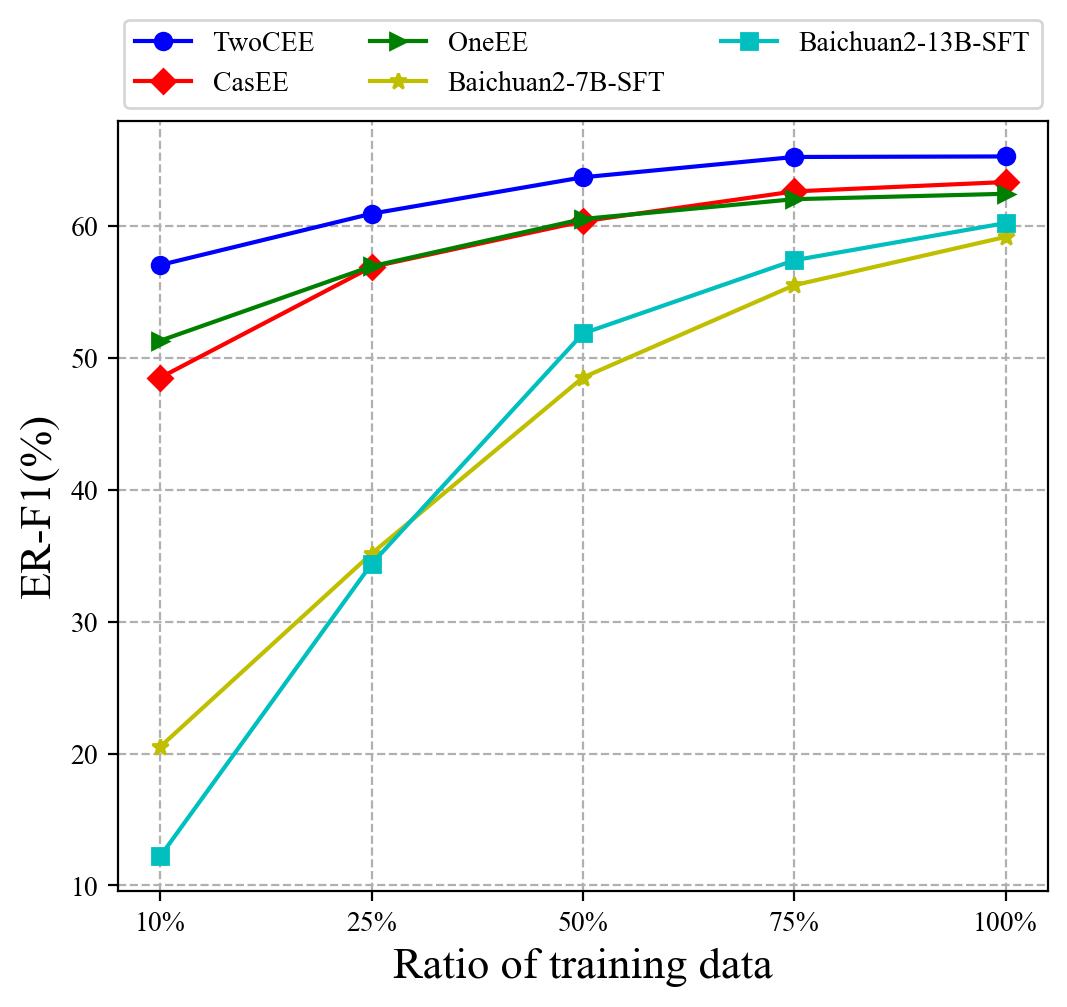

In [28]:
plt.figure(figsize=(6, 5))
# fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 10))


func_list = ['TwoCEE', 'CasEE', 'OneEE', 'Baichuan2-7B-SFT', 'Baichuan2-13B-SFT']
colors = ['b', 'r', 'g', 'y', 'c', 'm']
markers = ['o', 'D', '>', '*', 's', 'x']
ratios = [0.1, 0.25, 0.5, 0.75, 1][0:]
ratios_str = ["10%", "25%", "50%", "75%", "100%"][0:]
for inx, func in enumerate(func_list):
    trig_f1_list = [main(func, 'v1', data_ratio=r)[0][2]*100 for r in ratios]
    argu_f1_list = [main(func, 'v1', data_ratio=r)[1][2]*100 for r in ratios]
    event_f1_list = [main(func, 'v1', data_ratio=r)[2][2]*100 for r in ratios]

    print(f'{func}-trig: {trig_f1_list}')
    print(f'{func}-argu: {argu_f1_list}')
    print(f'{func}-event: {event_f1_list}')
    print('\n')
    
    # ax0.plot(ratios_str, trig_f1_list, colors[inx], label=func, marker='o')
    # ax1.plot(ratios_str, argu_f1_list, colors[inx], label=func, marker='o')
    # plt.plot(ratios_str, event_f1_list, colors[inx], label=func, marker='o')
    plt.plot(ratios_str, event_f1_list, colors[inx], label=func, marker=markers[inx])


# ax0.set_ylabel('Trig-F1(%)', fontsize=16)
# ax1.set_ylabel('Argu-F1(%)', fontsize=16)
# ax2.set_ylabel('Event-F1(%)', fontsize=16)

plt.xlabel('Ratio of training data', fontsize=16)
plt.ylabel('ER-F1(%)', fontsize=16)
plt.legend(loc="lower right", fontsize=11)
plt.grid(True, linestyle='--')
lg = plt.legend(bbox_to_anchor=(0.5, 1.15), loc="upper center", ncol=3, fontsize=10)


# plt.savefig('Training-set-sampling-rate.png', dpi=500, bbox_inches='tight') # 解决图片不清晰，不完整的问题
plt.savefig('Results-of-low-resource-20240610.pdf')
plt.show()

TwoCEE-trig: [85.53, 85.78, 85.5, 84.00999999999999]
TwoCEE-argu: [65.88000000000001, 63.93, 62.86000000000001, 62.94]
TwoCEE-event: [65.25999999999999, 63.73, 62.029999999999994, 60.95]


CasEE-trig: [85.25, 85.97, 85.65, 84.00999999999999]
CasEE-argu: [64.38000000000001, 62.660000000000004, 61.83, 61.07]
CasEE-event: [63.32, 61.739999999999995, 60.39, 60.14000000000001]


OneEE-trig: [85.2, 85.28, 84.92, 83.82]
OneEE-argu: [63.79, 61.58, 60.519999999999996, 61.650000000000006]
OneEE-event: [62.43, 60.77, 59.57, 59.95]


Baichuan2-7B-SFT-trig: [78.44, 77.83, 77.47, 74.2]
Baichuan2-7B-SFT-argu: [59.64, 56.910000000000004, 56.63, 54.84]
Baichuan2-7B-SFT-event: [59.160000000000004, 56.16, 54.89000000000001, 53.269999999999996]


Baichuan2-13B-SFT-trig: [79.56, 79.29, 79.09, 76.94]
Baichuan2-13B-SFT-argu: [59.96, 56.769999999999996, 56.230000000000004, 55.1]
Baichuan2-13B-SFT-event: [60.209999999999994, 57.65, 56.38999999999999, 55.08]




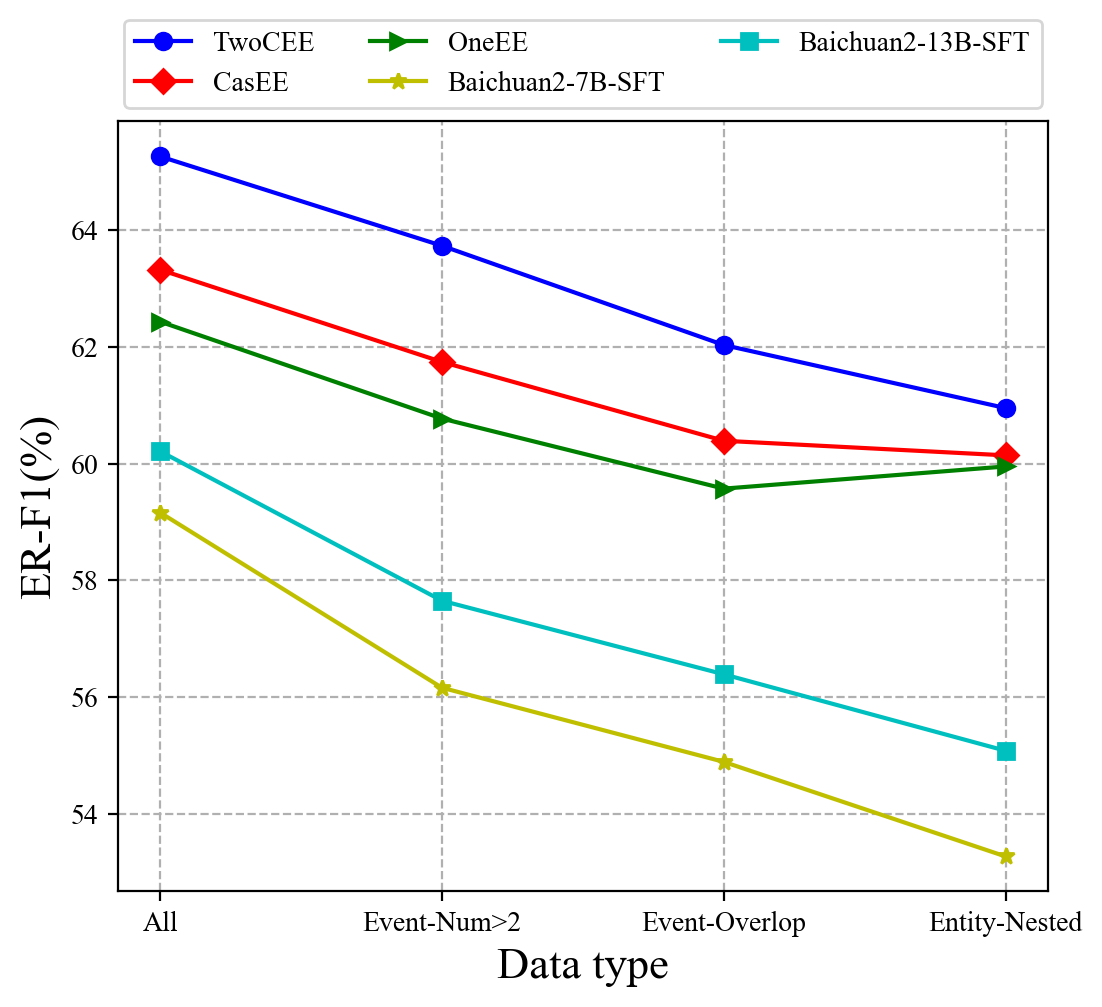

In [27]:
plt.figure(figsize=(6, 5))
# fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 10))


func_list = ['TwoCEE', 'CasEE', 'OneEE', 'Baichuan2-7B-SFT', 'Baichuan2-13B-SFT']
colors = ['b', 'r', 'g', 'y', 'c', 'm']
markers = ['o', 'D', '>', '*', 's', 'x']
filters = ['all', 3, 'event-overlop', 'entity-nested']
filters_label = ['All', 'Event-Num>2', 'Event-Overlop', 'Entity-Nested']

for inx, func in enumerate(func_list):
    trig_f1_list = [main(func, 'v1', filter=r)[0][2]*100 for r in filters]
    argu_f1_list = [main(func, 'v1', filter=r)[1][2]*100 for r in filters]
    event_f1_list = [main(func, 'v1', filter=r)[2][2]*100 for r in filters]

    print(f'{func}-trig: {trig_f1_list}')
    print(f'{func}-argu: {argu_f1_list}')
    print(f'{func}-event: {event_f1_list}')
    print('\n')
    
    # ax0.plot(filters, trig_f1_list, colors[inx], label=func, marker='o')
    # ax1.plot(filters, argu_f1_list, colors[inx], label=func, marker='o')
    plt.plot(filters_label, event_f1_list, colors[inx], label=func, marker=markers[inx])

# ax0.set_ylabel('Trig-F1(%)', fontsize=16)
# ax1.set_ylabel('Argu-F1(%)', fontsize=16)
# ax2.set_ylabel('Event-F1(%)', fontsize=16)

plt.xlabel('Data type', fontsize=16)
plt.ylabel('ER-F1(%)', fontsize=16)
plt.legend(loc="lower left", fontsize=11)
plt.grid(True, linestyle='--')


lg = plt.legend(bbox_to_anchor=(0.5, 1.15), loc="upper center", ncol=3, fontsize=10)
# plt.savefig('Results-of-complex-events-20240610.pdf', bbox_extra_artists=(lg,), bbox_inches="tight")


# plt.savefig('Results-on-multiple-events-overlapping-events-nested-entities.png', dpi=500, bbox_inches='tight') # 解决图片不清晰，不完整的问题
plt.savefig('Results-of-complex-events-20240610.pdf')

plt.show()

TwoCEE-trig: [85.53, 85.78, 85.5, 84.00999999999999]
TwoCEE-argu: [65.88000000000001, 63.93, 62.86000000000001, 62.94]
TwoCEE-event: [65.25999999999999, 63.73, 62.029999999999994, 60.95]


CasEE-trig: [85.25, 85.97, 85.65, 84.00999999999999]
CasEE-argu: [64.38000000000001, 62.660000000000004, 61.83, 61.07]
CasEE-event: [63.32, 61.739999999999995, 60.39, 60.14000000000001]


OneEE-trig: [85.2, 85.28, 84.92, 83.82]
OneEE-argu: [63.79, 61.58, 60.519999999999996, 61.650000000000006]
OneEE-event: [62.43, 60.77, 59.57, 59.95]


Baichuan2-7B-SFT-trig: [78.44, 77.83, 77.47, 74.2]
Baichuan2-7B-SFT-argu: [59.64, 56.910000000000004, 56.63, 54.84]
Baichuan2-7B-SFT-event: [59.160000000000004, 56.16, 54.89000000000001, 53.269999999999996]


Baichuan2-13B-SFT-trig: [79.56, 79.29, 79.09, 76.94]
Baichuan2-13B-SFT-argu: [59.96, 56.769999999999996, 56.230000000000004, 55.1]
Baichuan2-13B-SFT-event: [60.209999999999994, 57.65, 56.38999999999999, 55.08]


TwoCEE-trig: [76.99000000000001, 81.89, 84.37, 85.2

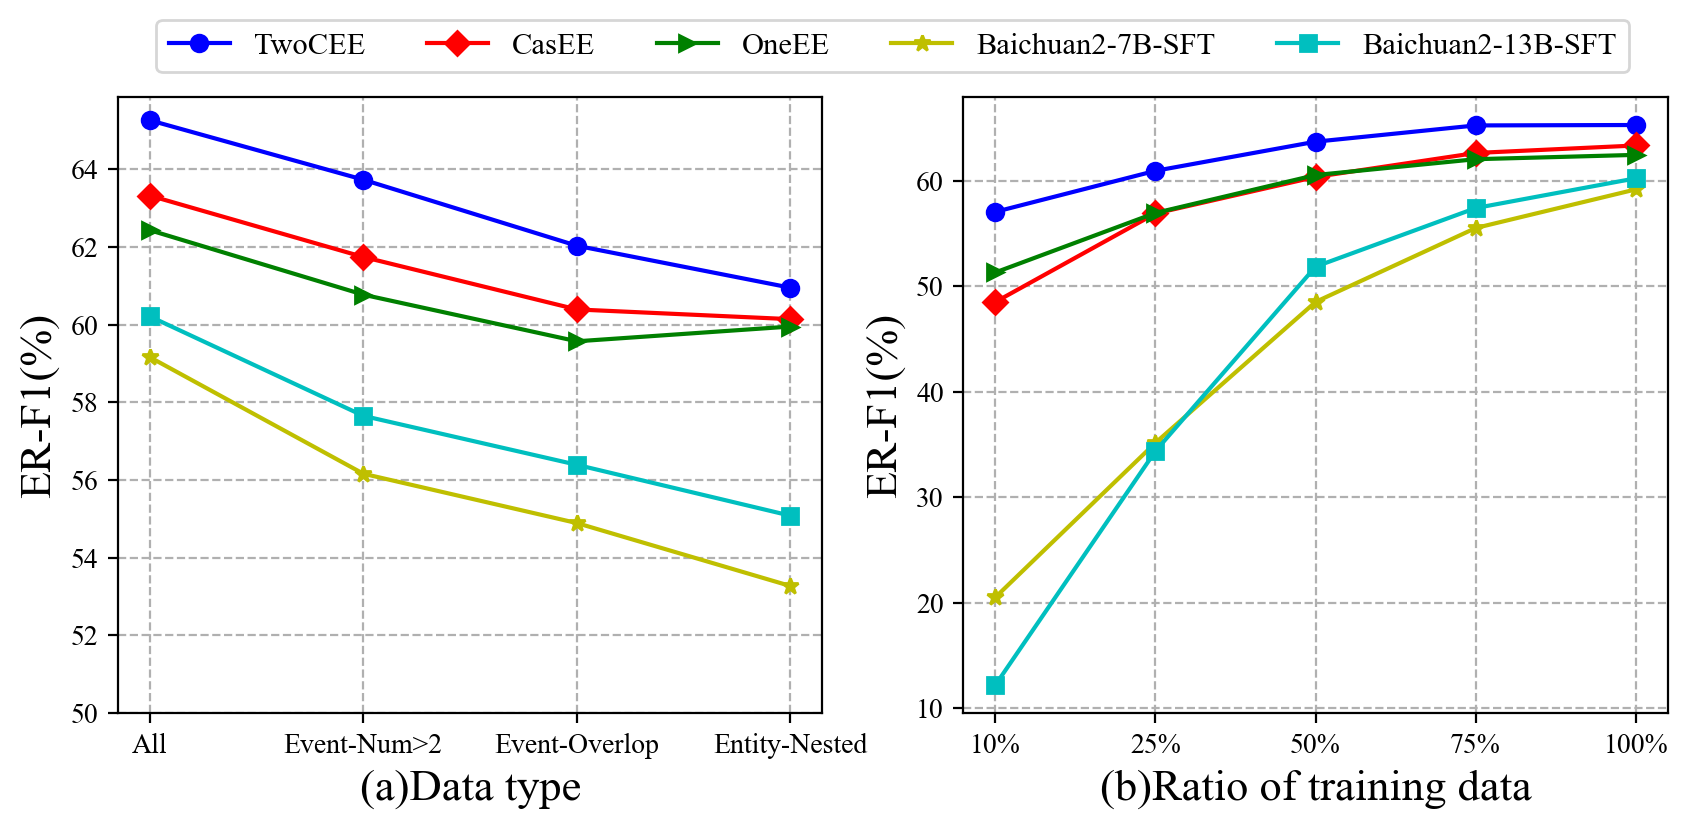

In [37]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 4))

func_list = ['TwoCEE', 'CasEE', 'OneEE', 'Baichuan2-7B-SFT', 'Baichuan2-13B-SFT']
colors = ['b', 'r', 'g', 'y', 'c', 'm']
markers = ['o', 'D', '>', '*', 's', 'x']

filters = ['all', 3, 'event-overlop', 'entity-nested']
filters_label = ['All', 'Event-Num>2', 'Event-Overlop', 'Entity-Nested']

for inx, func in enumerate(func_list):
    trig_f1_list = [main(func, 'v1', filter=r)[0][2]*100 for r in filters]
    argu_f1_list = [main(func, 'v1', filter=r)[1][2]*100 for r in filters]
    event_f1_list = [main(func, 'v1', filter=r)[2][2]*100 for r in filters]

    print(f'{func}-trig: {trig_f1_list}')
    print(f'{func}-argu: {argu_f1_list}')
    print(f'{func}-event: {event_f1_list}')
    print('\n')
    
    ax0.plot(filters_label, event_f1_list, colors[inx], label=func, marker=markers[inx])

ax0.set_xlabel('(a)Data type', fontsize=16)
ax0.set_ylabel('ER-F1(%)', fontsize=16)
ax0.set_ylim(50)
# ax0.set_yticks(np.arange(50, 72, 4))
# plt.legend(loc="lower left", fontsize=11)
ax0.grid(True, linestyle='--')


ratios = [0.1, 0.25, 0.5, 0.75, 1][0:]
ratios_str = ["10%", "25%", "50%", "75%", "100%"][0:]
for inx, func in enumerate(func_list):
    trig_f1_list = [main(func, 'v1', data_ratio=r)[0][2]*100 for r in ratios]
    argu_f1_list = [main(func, 'v1', data_ratio=r)[1][2]*100 for r in ratios]
    event_f1_list = [main(func, 'v1', data_ratio=r)[2][2]*100 for r in ratios]

    print(f'{func}-trig: {trig_f1_list}')
    print(f'{func}-argu: {argu_f1_list}')
    print(f'{func}-event: {event_f1_list}')
    print('\n')
    ax1.plot(ratios_str, event_f1_list, colors[inx], label=func, marker=markers[inx])

ax1.set_xlabel('(b)Ratio of training data', fontsize=16)
ax1.set_ylabel('ER-F1(%)', fontsize=16)
# ax0.legend(loc="lower right", fontsize=11)
ax1.grid(True, linestyle='--')


# plt.savefig('Results-on-multiple-events-overlapping-events-nested-entities.png', dpi=500, bbox_inches='tight') # 解决图片不清晰，不完整的问题
# plt.savefig('Results-of-multiple-events-overlapping-events-nested-entities.pdf')

lg = plt.legend(bbox_to_anchor=(-0.1, 1.15), loc="upper center", ncol=5, fontsize=11)

# plt.savefig(
#     "example.png", dpi=300, format="png", bbox_extra_artists=(lg,), bbox_inches="tight"
# )
plt.savefig('Results-of-low-resource-and-complex-events-20240430-2.pdf', bbox_extra_artists=(lg,), bbox_inches="tight")

plt.show()

结果备份

TwoCEE-trig: [85.53, 85.78, 85.5, 84.00999999999999]  
TwoCEE-argu: [65.88000000000001, 63.93, 62.86000000000001, 62.94]  
TwoCEE-event: [65.25999999999999, 63.73, 62.029999999999994, 60.95]  


CasEE-trig: [85.25, 85.97, 85.65, 84.00999999999999]  
CasEE-argu: [64.38000000000001, 62.660000000000004, 61.83, 61.07]  
CasEE-event: [63.32, 61.739999999999995, 60.39, 60.14000000000001]  


OneEE-trig: [85.2, 85.28, 84.92, 83.82]  
OneEE-argu: [63.79, 61.58, 60.519999999999996, 61.650000000000006]  
OneEE-event: [62.43, 60.77, 59.57, 59.95]  


Baichuan2-7B-SFT-trig: [78.44, 77.83, 77.47, 74.2]  
Baichuan2-7B-SFT-argu: [59.64, 56.910000000000004, 56.63, 54.84]  
Baichuan2-7B-SFT-event: [59.160000000000004, 56.16, 54.89000000000001, 53.269999999999996]  


Baichuan2-13B-SFT-trig: [79.56, 79.29, 79.09, 76.94]  
Baichuan2-13B-SFT-argu: [59.96, 56.769999999999996, 56.230000000000004, 55.1]  
Baichuan2-13B-SFT-event: [60.209999999999994, 57.65, 56.38999999999999, 55.08]  


TwoCEE-trig: [76.99000000000001, 81.89, 84.37, 85.28, 85.53]  
TwoCEE-argu: [56.67, 60.550000000000004, 64.47, 65.56, 65.88000000000001]  
TwoCEE-event: [57.03, 60.919999999999995, 63.68000000000001, 65.22, 65.25999999999999]  


CasEE-trig: [79.09, 82.56, 84.41, 84.7, 85.25]  
CasEE-argu: [46.98, 56.830000000000005, 61.49, 63.06, 64.38000000000001]  
CasEE-event: [48.49, 56.879999999999995, 60.34, 62.61, 63.32]  


OneEE-trig: [76.77000000000001, 81.47999999999999, 84.03, 85.1, 85.2]  
OneEE-argu: [48.620000000000005, 57.46, 61.129999999999995, 62.12, 63.79]  
OneEE-event: [51.29, 56.93, 60.519999999999996, 62.019999999999996, 62.43]  


Baichuan2-7B-SFT-trig: [43.9, 60.440000000000005, 70.81, 75.84, 78.44]  
Baichuan2-7B-SFT-argu: [16.950000000000003, 33.44, 46.85, 52.6, 59.64]  
Baichuan2-7B-SFT-event: [20.51, 35.15, 48.5, 55.50000000000001, 59.160000000000004]  


Baichuan2-13B-SFT-trig: [27.41, 59.67, 71.66, 77.0, 79.56]  
Baichuan2-13B-SFT-argu: [11.99, 31.5, 48.03, 56.66, 59.96]  
Baichuan2-13B-SFT-event: [12.2, 34.37, 51.839999999999996, 57.38999999999999, 60.209999999999994]  